## Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns',35)
sns.set_theme(font_scale=1.5)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
df=pd.read_csv('cancer_classification.csv')

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Distribution of target label

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

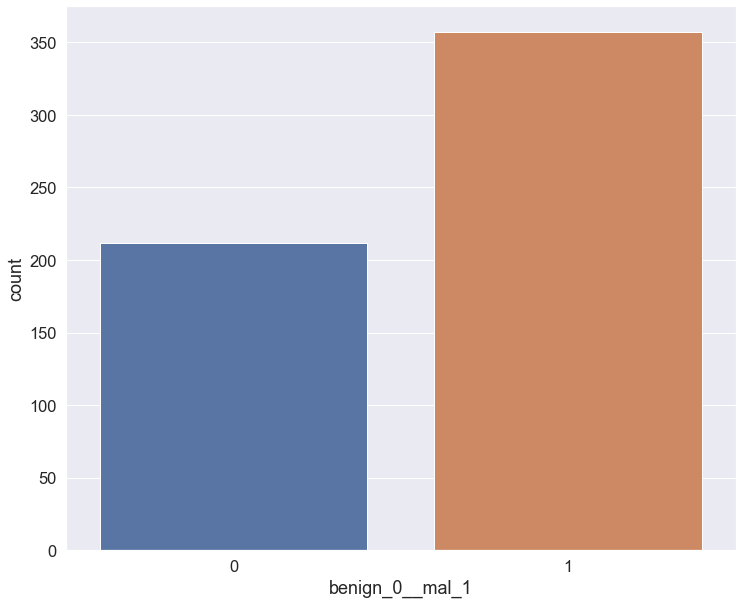

In [6]:
plt.figure(figsize=(12,10))
sns.countplot(x='benign_0__mal_1',data=df)

### Correlation with label variable

<AxesSubplot:>

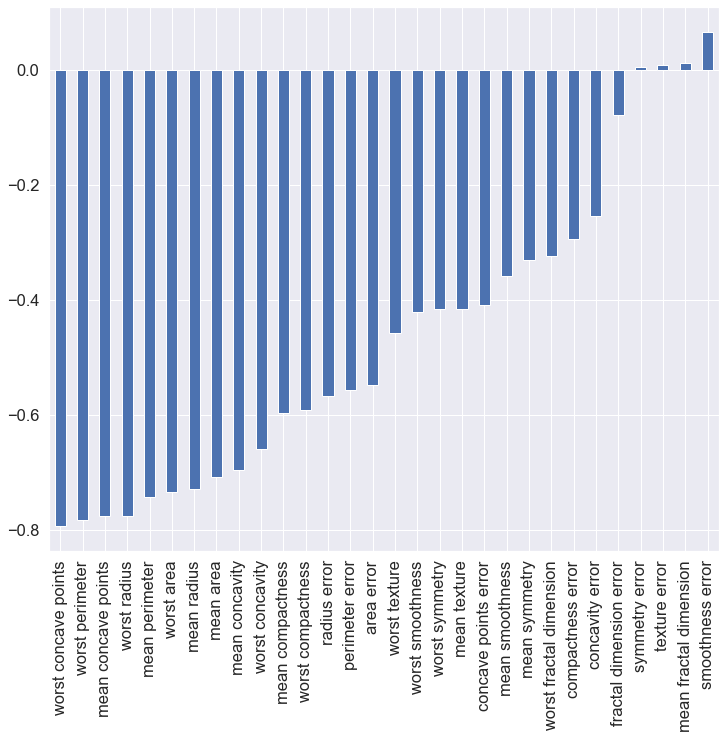

In [7]:
plt.figure(figsize=(12,10))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

### Correlation of variables with each other

<AxesSubplot:>

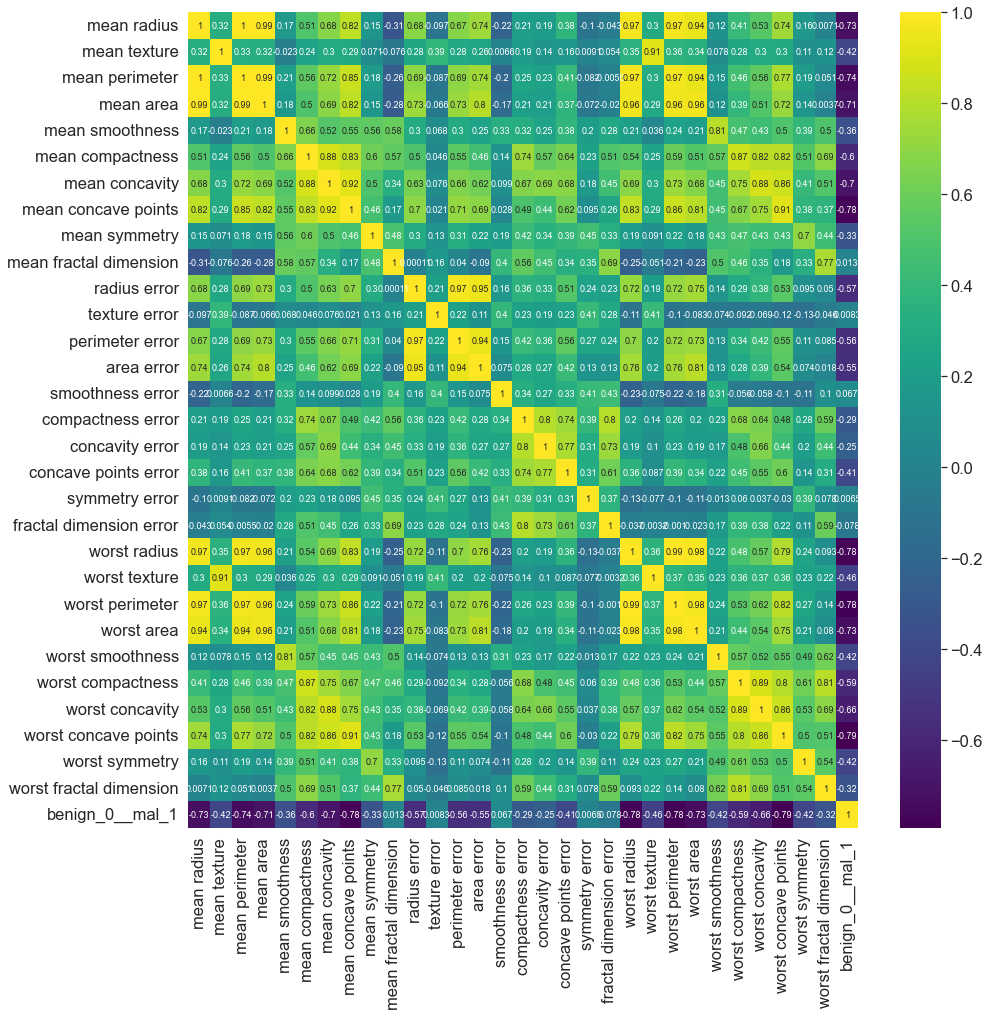

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='viridis',annot=True,annot_kws={'size':9})

### Many parameters are correlated

## Data splitting and scaling

In [9]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
scaler=MinMaxScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
X_test=scaler.transform(X_test)

## Deep Learning Model

In [14]:
X_train.shape

(426, 30)

In [15]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# Binary Classification problem
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [16]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 25ms/step - loss: 0.6719 - val_loss: 0.6566
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6444 - val_loss: 0.6274
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6114 - val_loss: 0.5877
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5674 - val_loss: 0.5403
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5172 - val_loss: 0.4851
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4612 - val_loss: 0.4287
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4062 - val_loss: 0.3747
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3580 - val_loss: 0.3285
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3192 - val_loss: 0.2899
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2863 - val_loss: 0.2604
Epoch 11

In [17]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

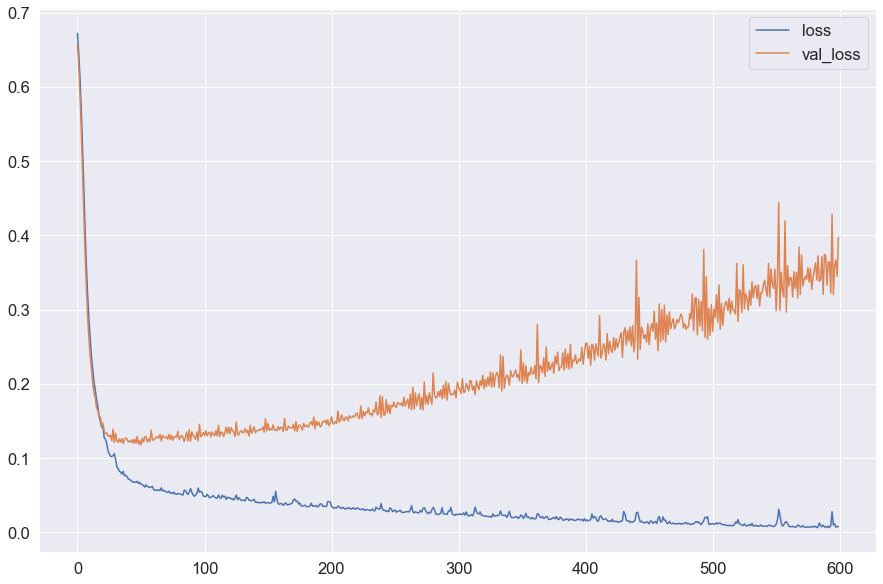

In [18]:
losses.plot(figsize=(15,10))

### Test error is increasing meaning that the model is overfitting. 
### Number of epochs are too high.

## New model with Callbacks: Earlystopping

In [20]:
model1=Sequential()

model1.add(Dense(30,activation='relu'))

model1.add(Dense(15,activation='relu'))

# Binary Classification problem
model1.add(Dense(1,activation='sigmoid'))

model1.compile(optimizer='adam',loss='binary_crossentropy')

In [22]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [23]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [24]:
model1.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 28ms/step - loss: 0.6916 - val_loss: 0.6727
Epoch 2/600
14/14 [==============================] - 0s 33ms/step - loss: 0.6611 - val_loss: 0.6499
Epoch 3/600
14/14 [==============================] - 0s 31ms/step - loss: 0.6375 - val_loss: 0.6241
Epoch 4/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6089 - val_loss: 0.5929
Epoch 5/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5751 - val_loss: 0.5563
Epoch 6/600
14/14 [==============================] - 0s 23ms/step - loss: 0.5379 - val_loss: 0.5158
Epoch 7/600
14/14 [==============================] - 0s 23ms/step - loss: 0.4985 - val_loss: 0.4734
Epoch 8/600
14/14 [==============================] - 0s 18ms/step - loss: 0.4571 - val_loss: 0.4313
Epoch 9/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4172 - val_loss: 0.3902
Epoch 10/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3770 - val_loss: 0.3472

In [25]:
losses_new=pd.DataFrame(model1.history.history)

<AxesSubplot:>

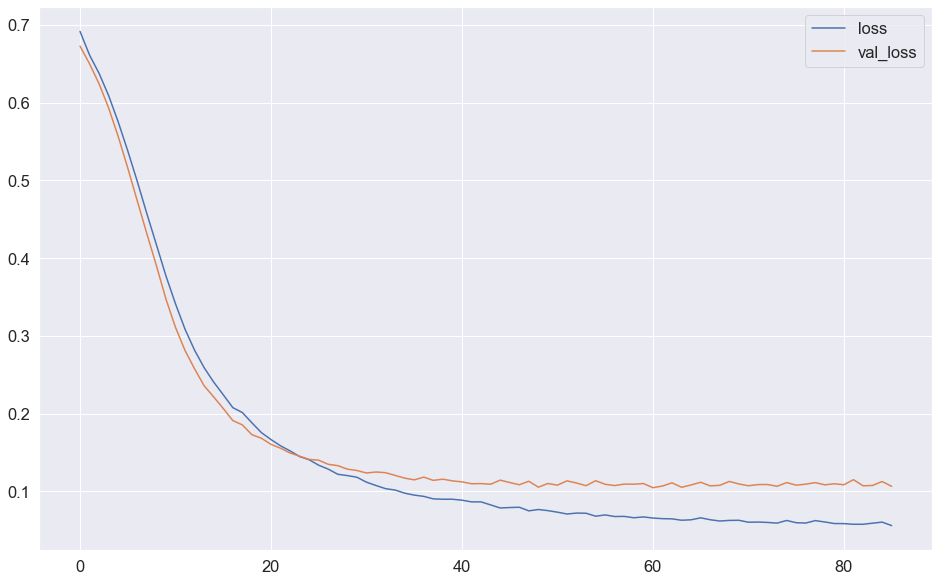

In [26]:
losses_new.plot(figsize=(16,10))

## Using Dropout layers

In [27]:
model2=Sequential()

model2.add(Dense(30,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(15,activation='relu'))
model2.add(Dropout(0.5))

# Binary Classification problem
model2.add(Dense(1,activation='sigmoid'))

model2.compile(optimizer='adam',loss='binary_crossentropy')

In [28]:
model2.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 39ms/step - loss: 0.7043 - val_loss: 0.6595
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6855 - val_loss: 0.6377
Epoch 3/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6518 - val_loss: 0.6138
Epoch 4/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6518 - val_loss: 0.5923
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6185 - val_loss: 0.5694
Epoch 6/600
14/14 [==============================] - 0s 35ms/step - loss: 0.6095 - val_loss: 0.5448
Epoch 7/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5996 - val_loss: 0.5222
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5603 - val_loss: 0.4952
Epoch 9/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5508 - val_loss: 0.4736
Epoch 10/600
14/14 [==============================] - 0s 28ms/step - loss: 0.5343 - val_loss: 0.4487
E

In [29]:
losses_2=pd.DataFrame(model2.history.history)

<AxesSubplot:>

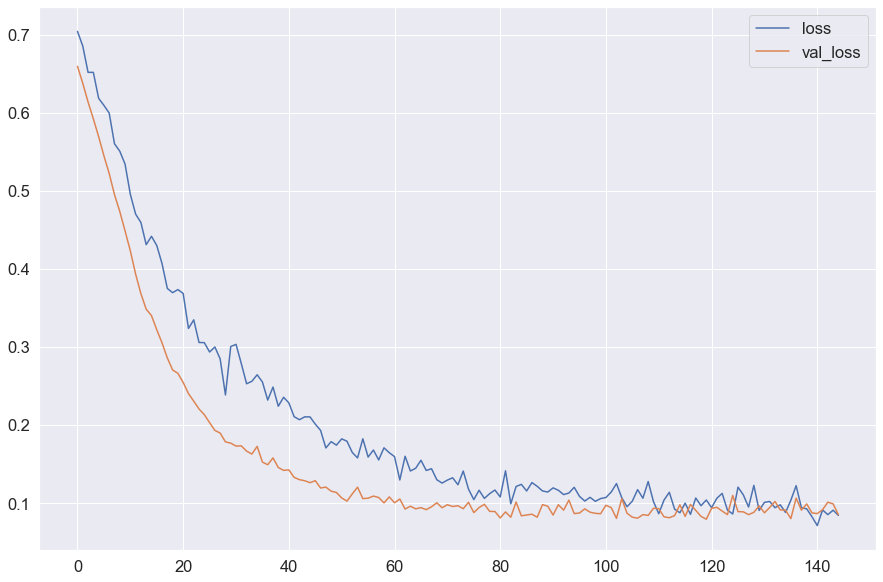

In [30]:
losses_2.plot(figsize=(15,10))

## Predictions

In [33]:
model2.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'